In [1]:
import torch
import matplotlib.pyplot as plt
from source.functions.vae import *
from source.functions.one_hot_encode import *

In [2]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
data=torch.load( '/u/dssc/acesa000/fast/Street_View_Generator_data/dataset.pt')

In [4]:
print(data[1][1])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.])


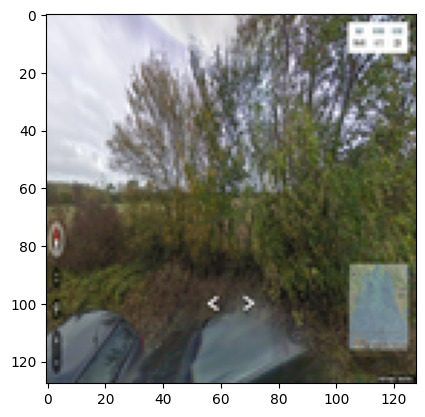

In [5]:
plt.imshow(data[5][0].permute(1,2,0))


In [6]:
model=VariationalAutoEncoder(256)
model.load_state_dict(torch.load('models/model5e-05_256.pt',map_location=device))
model.eval()

VariationalAutoEncoder(
  (image_encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
   

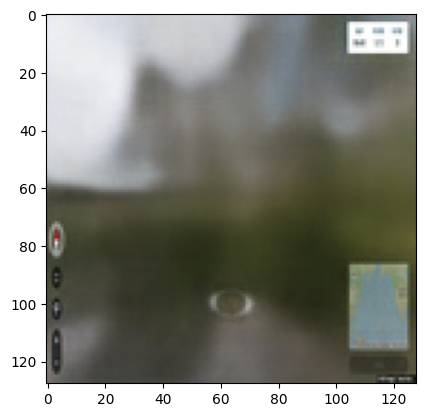

In [7]:
gen_imm=model(data[5][0].unsqueeze(0),data[1][1].unsqueeze(0))[0]
plt.imshow(gen_imm[0].permute(1,2,0).detach().numpy() )

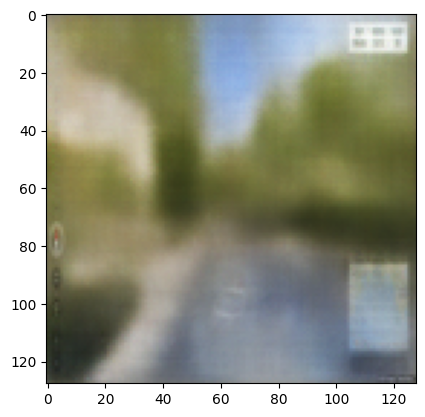

In [12]:
gen_imm=model.generate('South_Africa')
plt.imshow(gen_imm[0].permute(1,2,0).detach().numpy() )
